1. Importing the necessary data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
# Importing all datasets
data = pd.read_csv("leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
data_dict= pd.read_excel("Leads Data Dictionary.xlsx")
data_dict.head()
data_dict.columns=data_dict.iloc[1]
data_dict=data_dict[2:]
data_dict

1,NaN,Variables,Description
2,NaN,Prospect ID,A unique ID with which the customer is identif...
3,NaN,Lead Number,A lead number assigned to each lead procured.
4,NaN,Lead Origin,The origin identifier with which the customer ...
5,NaN,Lead Source,"The source of the lead. Includes Google, Organ..."
6,NaN,Do Not Email,An indicator variable selected by the customer...
7,NaN,Do Not Call,An indicator variable selected by the customer...
8,NaN,Converted,The target variable. Indicates whether a lead ...
9,NaN,TotalVisits,The total number of visits made by the custome...
10,NaN,Total Time Spent on Website,The total time spent by the customer on the we...
11,NaN,Page Views Per Visit,Average number of pages on the website viewed ...


In [4]:
# checking the dimensions of the data
data.shape

(9240, 37)

In [5]:
# Checking the data statistics
data.describe()
# Data is missing for certain columns
# Presence of outliers in TotalVisits , Page Views and Total time spent. Need further analysis to confirm if they are outliers
# Data is biased towards conversions (75% of data are leads so there will be bias)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## 2. Data Cleaning


In [7]:
def Data_Info(data,i):
    data_info=round(100*data.isnull().sum()/len(data),2)
    return data_info[data_info>i]

In [8]:
Data_Info(data,0)

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     29.32
City                                             15.37
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
dtype: float64

In [9]:
# Checking the null values and dropping the columns with more than 45% nulls
Data_Info(data,45)
data.drop(Data_Info(data,45).index,axis=1,inplace=True)
Data_Info(data,0)

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Profile                                     29.32
City                                             15.37
dtype: float64

In [10]:
#Replacing all the default values to Not Provided 
DataCols=Data_Info(data,0).index
for col in DataCols:
    data[col].replace('Select','Not Provided',inplace=True)
Data_Info(data,0)

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Profile                                     29.32
City                                             15.37
dtype: float64

In [11]:
data[data.Tags.isnull()].isnull().sum()
#Lead profile and what matters most have same nulls. will be better to handle these nulls

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        11
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                        20
Total Time Spent on Website                         0
Page Views Per Visit                               20
Last Activity                                       9
Country                                          1179
Specialization                                   1404
How did you hear about X Education               2139
What is your current occupation                  2609
What matters most to you in choosing a course    2628
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
data[data['Lead Profile'].isnull()].isnull().sum()
data=data[~data['Lead Profile'].isnull()]
Data_Info(data,0)

Lead Source              0.55
TotalVisits              1.99
Page Views Per Visit     1.99
Last Activity            1.58
Country                 24.58
Tags                    11.10
dtype: float64

In [13]:
data.Country.value_counts()
# Data is fully skewed towards India so we will drop this column
data.drop(['Country'],axis=1,inplace=True)
Data_Info(data,0)

Lead Source              0.55
TotalVisits              1.99
Page Views Per Visit     1.99
Last Activity            1.58
Tags                    11.10
dtype: float64

In [14]:
# Impute missing values with not tagged
data.Tags.fillna('Not Tagged',inplace=True)
Data_Info(data,0)


Lead Source             0.55
TotalVisits             1.99
Page Views Per Visit    1.99
Last Activity           1.58
dtype: float64

In [15]:
data[data['TotalVisits'].isnull()]
data=data[~data['TotalVisits'].isnull()]
Data_Info(data,0)

Lead Source    0.45
dtype: float64

In [16]:
data[data['Lead Source'].isnull()]['Lead Profile'].value_counts()

Lead Profile
Not Provided      24
Potential Lead     5
Name: count, dtype: int64

In [17]:
data=data[~data['Lead Source'].isnull()]
Data_Info(data,0)

Series([], dtype: float64)

In [18]:
len(data)/9270
#we have retained ~68.7% of our original data

0.6873786407766991

## 3. Data Transformation 

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6372 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    6372 non-null   object 
 1   Lead Number                                    6372 non-null   int64  
 2   Lead Origin                                    6372 non-null   object 
 3   Lead Source                                    6372 non-null   object 
 4   Do Not Email                                   6372 non-null   object 
 5   Do Not Call                                    6372 non-null   object 
 6   Converted                                      6372 non-null   int64  
 7   TotalVisits                                    6372 non-null   float64
 8   Total Time Spent on Website                    6372 non-null   int64  
 9   Page Views Per Visit                           6372 non-n

In [20]:
#dropping unnecessary column as they add no value
data.drop(['Prospect ID','Lead Number','City'],axis=1,inplace=True)

In [21]:
def CategoryValueCounts(data):
    column_list=data.columns
    for col in column_list:
        print(col,' : ', len(data[col].value_counts()))

In [22]:
# Function to retun object type variables in the dataframe
def ListObjectTypeCols(data):
    column_list=data.columns
    categorical_cols=[]
    for col in column_list:
    
        if data[col].dtype=='O':
            categorical_cols.append(col)
    return categorical_cols

In [23]:
# Some columsn have just 1 value for all the data, since this does not add any value, we can drop these columns
categorical_cols=ListObjectTypeCols(data)
print("Columns with singular value..")
singular_cols=[]
for col in categorical_cols:
    
    if len(data[col].value_counts())==1:
        print(data[col].value_counts()) 
        singular_cols.append(col)
print("Dropping these columns...")  
data.drop(singular_cols,axis=1,inplace=True)
print('Singular columns dropped!')

Columns with singular value..
Magazine
No    6372
Name: count, dtype: int64
X Education Forums
No    6372
Name: count, dtype: int64
Receive More Updates About Our Courses
No    6372
Name: count, dtype: int64
Update me on Supply Chain Content
No    6372
Name: count, dtype: int64
Get updates on DM Content
No    6372
Name: count, dtype: int64
I agree to pay the amount through cheque
No    6372
Name: count, dtype: int64
Dropping these columns...
Singular columns dropped!


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6372 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    6372 non-null   object 
 1   Lead Source                                    6372 non-null   object 
 2   Do Not Email                                   6372 non-null   object 
 3   Do Not Call                                    6372 non-null   object 
 4   Converted                                      6372 non-null   int64  
 5   TotalVisits                                    6372 non-null   float64
 6   Total Time Spent on Website                    6372 non-null   int64  
 7   Page Views Per Visit                           6372 non-null   float64
 8   Last Activity                                  6372 non-null   object 
 9   Specialization                                 6372 non-n

In [25]:
# Getting the list of binary columns to map th evalues to 0, 1 and convert to numerical
categorical_cols=ListObjectTypeCols(data)
binary_cols=[]
for col in categorical_cols:
    if len(data[col].value_counts())==2:
        print(data[col].value_counts())
        binary_cols.append(col)
for col in binary_cols:
    data[col]=data[col].map({'Yes':1,'No':0})
data[binary_cols].describe()

Do Not Email
No     5938
Yes     434
Name: count, dtype: int64
Do Not Call
No     6370
Yes       2
Name: count, dtype: int64
Search
No     6362
Yes      10
Name: count, dtype: int64
Newspaper Article
No     6371
Yes       1
Name: count, dtype: int64
Newspaper
No     6371
Yes       1
Name: count, dtype: int64
Digital Advertisement
No     6369
Yes       3
Name: count, dtype: int64
Through Recommendations
No     6366
Yes       6
Name: count, dtype: int64
A free copy of Mastering The Interview
No     4201
Yes    2171
Name: count, dtype: int64


,Do Not Email,Do Not Call,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000
mean,0.068110,0.000314,0.001569,0.000157,0.000157,0.000471,0.000942,0.340709
std,0.251955,0.017715,0.039587,0.012527,0.012527,0.021695,0.030674,0.473985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
#BAsed on the binary columns values, most of them are skewed heavily, we will be dropping these except the 'A free copy of Mastering The Interview'
binary_cols.remove('A free copy of Mastering The Interview')
binary_cols

['Do Not Email',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations']

In [27]:
data.drop(binary_cols,axis=1,inplace=True)

In [28]:
print(data['Last Notable Activity'].value_counts())
cols=list(data['Last Notable Activity'].value_counts().index[3:])
data['Last Notable Activity']=data['Last Notable Activity'].apply(lambda x: 'Others' if x in cols else x )
print(data['Last Notable Activity'].value_counts())

Last Notable Activity
Email Opened                    2038
Modified                        1947
SMS Sent                        1869
Page Visited on Website          212
Email Link Clicked               110
Olark Chat Conversation           76
Email Bounced                     49
Unsubscribed                      31
Unreachable                       22
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Name: count, dtype: int64
Last Notable Activity
Email Opened    2038
Modified        1947
SMS Sent        1869
Others           518
Name: count, dtype: int64


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6372 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    6372 non-null   object 
 1   Lead Source                                    6372 non-null   object 
 2   Converted                                      6372 non-null   int64  
 3   TotalVisits                                    6372 non-null   float64
 4   Total Time Spent on Website                    6372 non-null   int64  
 5   Page Views Per Visit                           6372 non-null   float64
 6   Last Activity                                  6372 non-null   object 
 7   Specialization                                 6372 non-null   object 
 8   How did you hear about X Education             6372 non-null   object 
 9   What is your current occupation                6372 non-n

In [30]:
data['How did you hear about X Education'].value_counts()

How did you hear about X Education
Not Provided             4886
Online Search             604
Word Of Mouth             250
Student of SomeSchool     238
Other                     145
Multiple Sources          113
Social Media               52
Advertisements             50
Email                      22
SMS                        12
Name: count, dtype: int64

In [31]:
data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5475
Working Professional     673
Student                  193
Other                     15
Housewife                  9
Businessman                7
Name: count, dtype: int64

In [32]:
data['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6370
Flexibility & Convenience       1
Other                           1
Name: count, dtype: int64

In [33]:
data.drop(['What matters most to you in choosing a course'],axis=1,inplace=True)

In [34]:
ListObjectTypeCols(data)

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'Tags',
 'Lead Profile',
 'Last Notable Activity']

In [35]:
DummyCols=ListObjectTypeCols(data)
DummyCols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'Tags',
 'Lead Profile',
 'Last Notable Activity']

In [36]:
dummy=pd.get_dummies(data[DummyCols],drop_first=True,dtype='int')
dummy.head
data_final=pd.concat([data,dummy],axis=1)


In [37]:
data_final.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       ...
       'Tags_switched off', 'Tags_wrong number given',
       'Lead Profile_Lateral Student', 'Lead Profile_Not Provided',
       'Lead Profile_Other Leads', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool', 'Last Notable Activity_Modified',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object', length=113)

In [38]:
data_final.drop(ListObjectTypeCols(data_final),axis=1,inplace=True)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6372 entries, 0 to 9239
Columns: 104 entries, Converted to Last Notable Activity_SMS Sent
dtypes: float64(2), int32(99), int64(3)
memory usage: 2.7 MB


In [39]:
data_final.Converted.value_counts()

Converted
0    3307
1    3065
Name: count, dtype: int64

In [40]:
data_final.dtypes

Converted                                                     int64
TotalVisits                                                 float64
Total Time Spent on Website                                   int64
Page Views Per Visit                                        float64
A free copy of Mastering The Interview                        int64
Lead Origin_Landing Page Submission                           int32
Lead Origin_Lead Add Form                                     int32
Lead Origin_Lead Import                                       int32
Lead Source_Direct Traffic                                    int32
Lead Source_Facebook                                          int32
Lead Source_Google                                            int32
Lead Source_Live Chat                                         int32
Lead Source_Olark Chat                                        int32
Lead Source_Organic Search                                    int32
Lead Source_Pay per Click Ads                   

## 4. Train Test Split

In [41]:
# Import the required library
from sklearn.model_selection import train_test_split

In [42]:
X=data_final.drop(['Converted'],axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Provided,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not Tagged,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Not Provided,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1

In [43]:
# Putting the target variable in y
y = data_final['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [44]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [45]:
X.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Provided,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not Tagged,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Not Provided,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
count,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.0

In [46]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Provided,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not Tagged,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Not Provided,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
643,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6919,0.007968,0.108715,0.036364,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1967,0.015936,0.495158,0.036364,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2857,0.015936,0.150968,0.072727,0,0,0,0,0,0,1,0,0

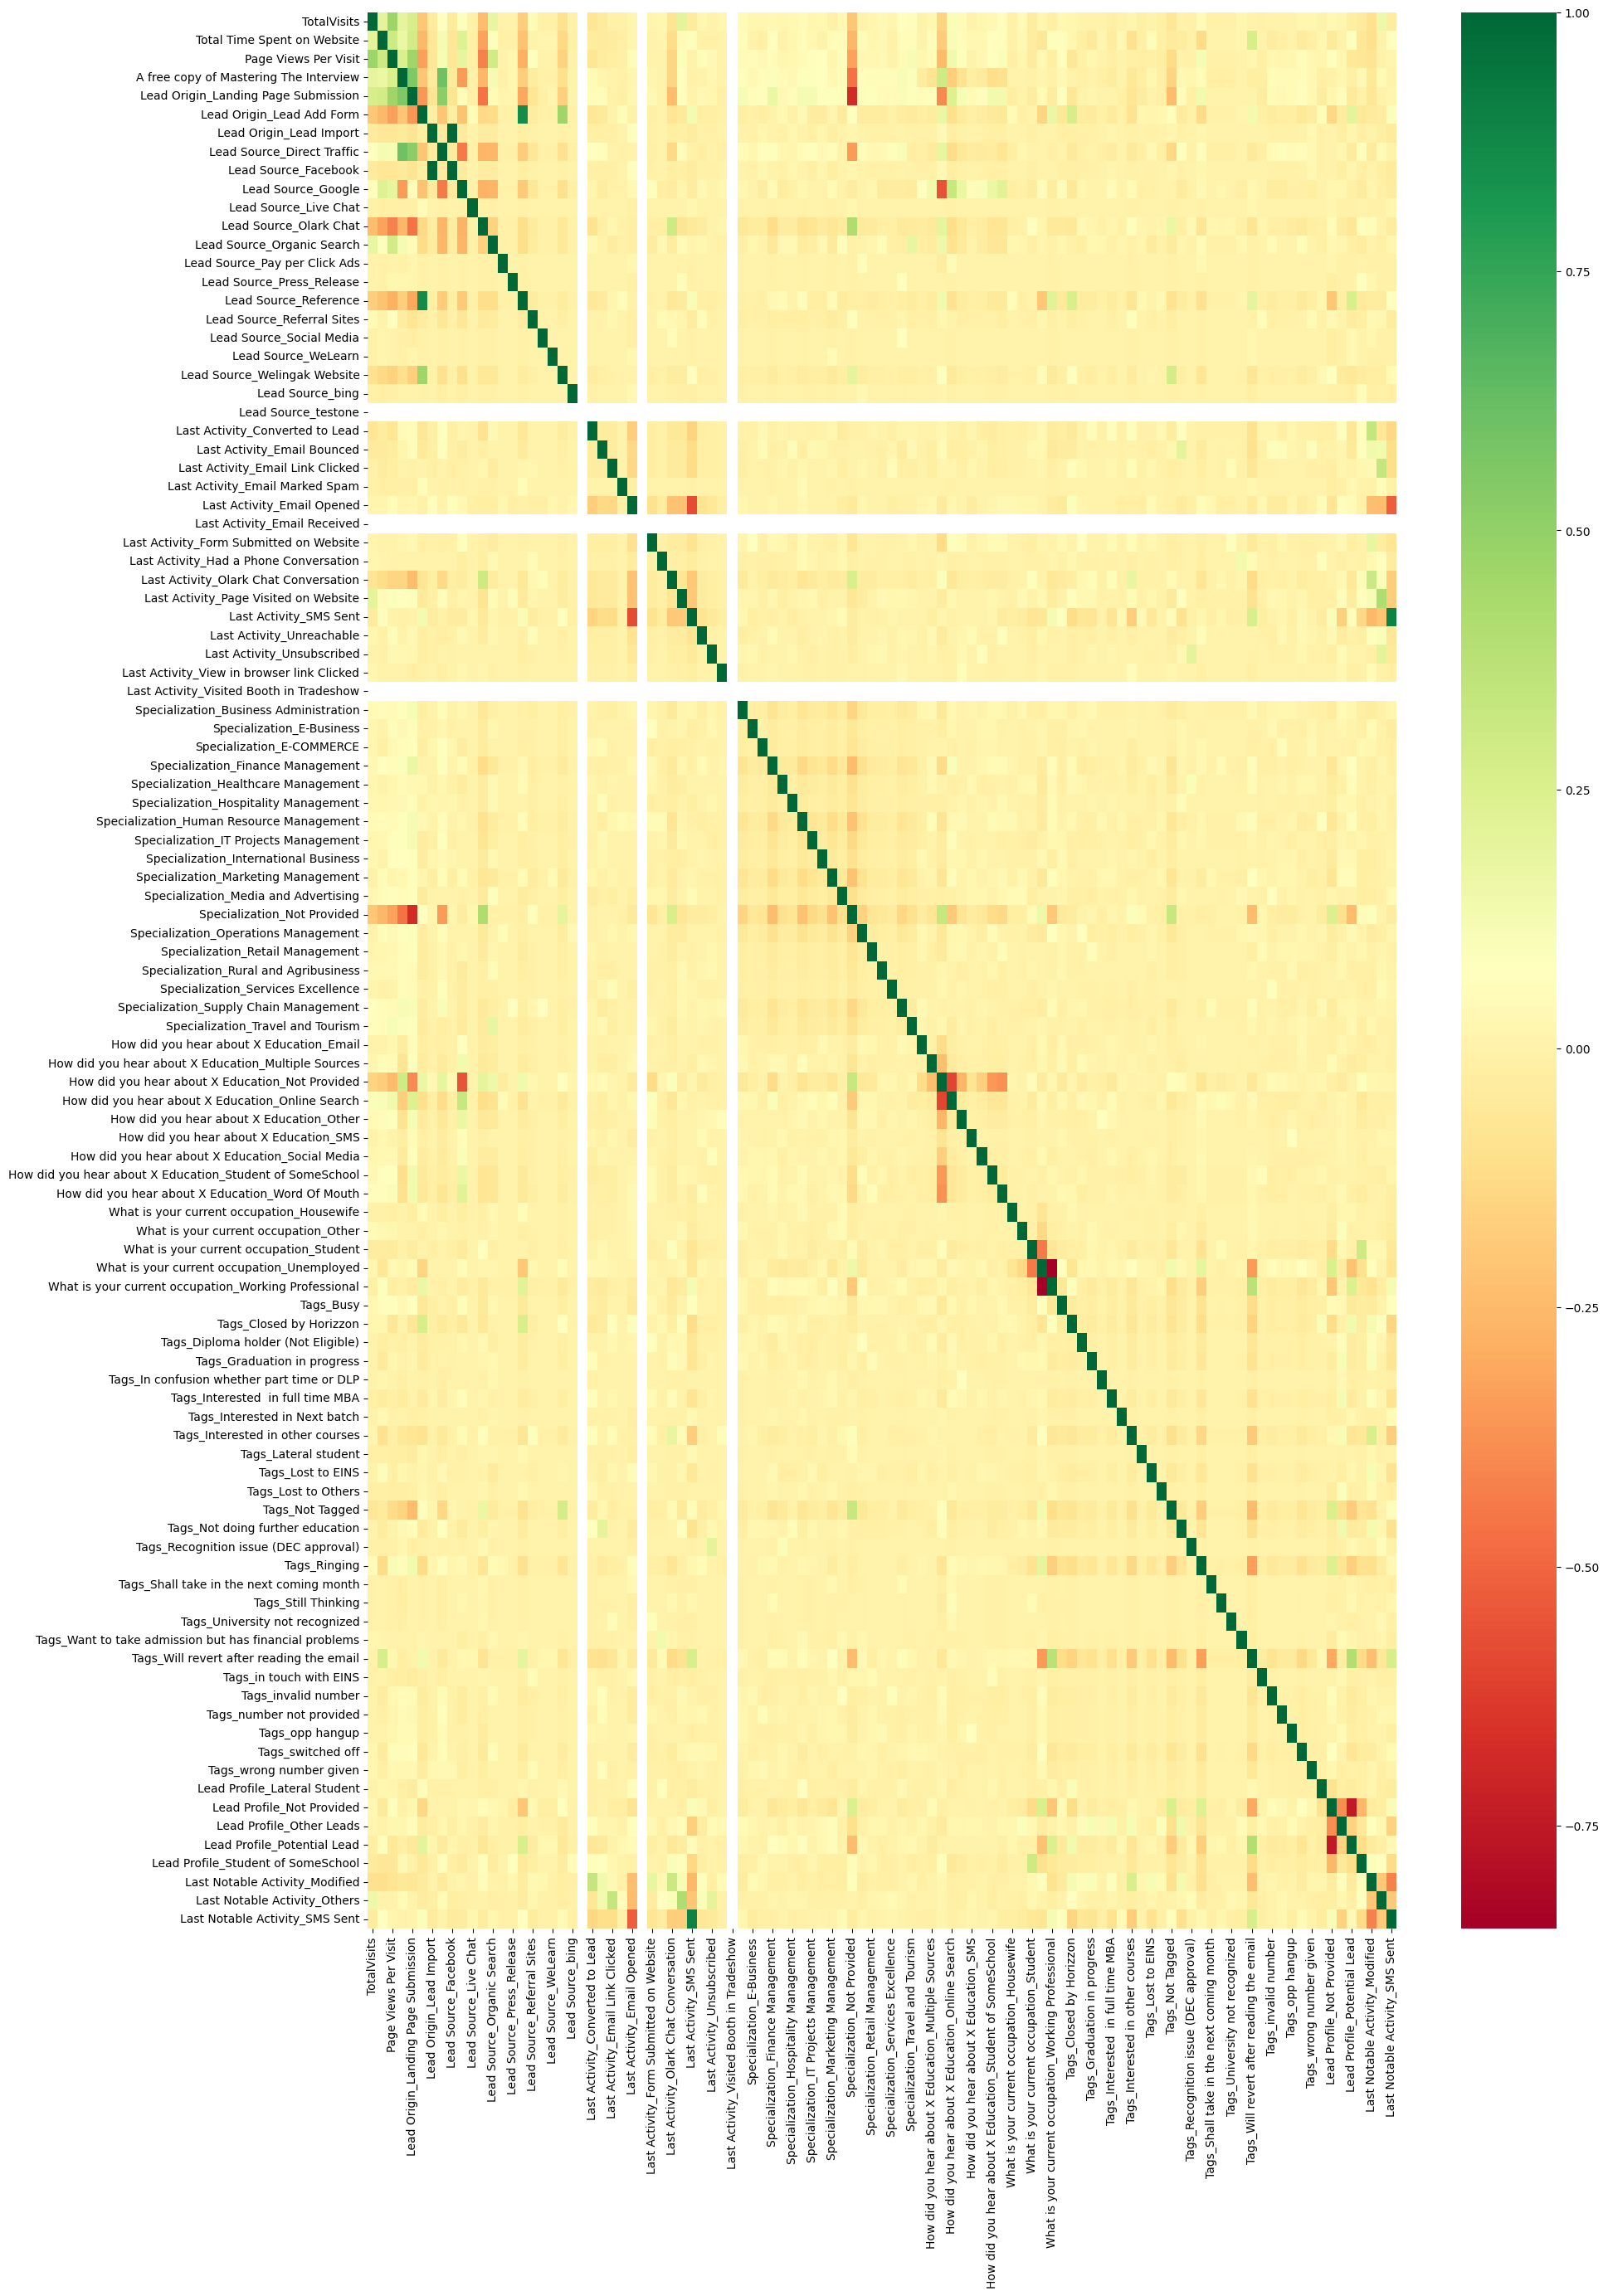

In [47]:
# To check the correlation among varibles
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr(),cmap="RdYlGn")
plt.show()

## 5. Model Building and feature selection using RFE

In [48]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [49]:
from sklearn.feature_selection import RFE
# Running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [50]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('A free copy of Mastering The Interview', False, 80),
 ('Lead Origin_Landing Page Submission', False, 67),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 47),
 ('Lead Source_Direct Traffic', False, 30),
 ('Lead Source_Facebook', False, 37),
 ('Lead Source_Google', False, 39),
 ('Lead Source_Live Chat', False, 84),
 ('Lead Source_Olark Chat', False, 9),
 ('Lead Source_Organic Search', False, 38),
 ('Lead Source_Pay per Click Ads', False, 81),
 ('Lead Source_Press_Release', False, 85),
 ('Lead Source_Reference', False, 64),
 ('Lead Source_Referral Sites', False, 48),
 ('Lead Source_Social Media', False, 70),
 ('Lead Source_WeLearn', False, 83),
 ('Lead Source_Welingak Website', False, 2),
 ('Lead Source_bing', False, 71),
 ('Lead Source_testone', False, 87),
 ('Last Activity_Converted to Lead', False, 60),
 ('Last Activity_Email Bounced', True, 1),


In [51]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Not Tagged', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Profile_Student of SomeSchool'],
      dtype='object')

In [52]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4444
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -708.12
Date:                Mon, 15 Jan 2024   Deviance:                       1416.2
Time:                        00:42:40   Pearson chi2:                 4.76e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6561
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.4334      0.235    -18.870      0.000      -4.894      -3.973
Total Time Spent on Website                  3.2218      0.309     10.435      0.000       2.617       3.827
Lead Origin_Lead Add Form                    2.1428      0.348      6.150      0.000       1.460       2.826
Last Activity_Email Bounced                 -1.5746      0.525     -3.001      0.003      -2.603      -0.546
Last Activity_SMS Sent                       1.7241      0.168     10.245      0.000       1.394       2.054
Tags_Busy                                    2.8218      0.290      9.742      0.000       2.254       3.390
Tags_Closed by Horizzon                      8.4489      1.031      8.195      0.000       6.428      10.470
Tags_Lateral student                        27.5193    1.2e+05      0.000      1.000   -2.35e+05    2.35e+05
Tags_Lost to EINS                            6.8539      0.646     10.613      0.000       5.588       8.120
Tags_Not Tagged                              3.9828      0.238     16.759      0.000       3.517       4.449
Tags_Not doing further education           -21.8983   2.03e+04     -0.001      0.999   -3.98e+04    3.98e+04
Tags_Ringing                                -0.9816      0.306     -3.207      0.001      -1.581      -0.382
Tags_Will revert after reading the email     6.3235      0.262     24.145      0.000       5.810       6.837
Tags_invalid number                        -22.8204   2.56e+04     -0.001      0.999   -5.01e+04    5.01e+04
Tags_switched off                           -1.1424      0.565     -2.023      0.043      -2.249      -0.036
Lead Profile_Student of SomeSchool          -1.8961      0.818     -2.317      0.020      -3.500      -0.292
============================================================================================================
"""

In [53]:
#Droppinng Tags_Lateral student
X_train_sm2=X_train_sm.drop(['Tags_Lateral student'],axis=1)
logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -713.68
Date:                Mon, 15 Jan 2024   Deviance:                       1427.4
Time:                        00:42:40   Pearson chi2:                 4.80e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6552
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.3438      0.227    -19.162      0.000      -4.788      -3.900
Total Time Spent on Website                  3.1875      0.307     10.399      0.000       2.587       3.788
Lead Origin_Lead Add Form                    2.1964      0.348      6.314      0.000       1.515       2.878
Last Activity_Email Bounced                 -1.5685      0.524     -2.992      0.003      -2.596      -0.541
Last Activity_SMS Sent                       1.7668      0.168     10.500      0.000       1.437       2.097
Tags_Busy                                    2.7197      0.284      9.585      0.000       2.164       3.276
Tags_Closed by Horizzon                      8.3578      1.029      8.121      0.000       6.341      10.375
Tags_Lost to EINS                            6.7709      0.643     10.524      0.000       5.510       8.032
Tags_Not Tagged                              3.8855      0.230     16.914      0.000       3.435       4.336
Tags_Not doing further education           -21.9897   2.03e+04     -0.001      0.999   -3.98e+04    3.98e+04
Tags_Ringing                                -1.0974      0.300     -3.655      0.000      -1.686      -0.509
Tags_Will revert after reading the email     6.2320      0.255     24.430      0.000       5.732       6.732
Tags_invalid number                        -22.9264   2.56e+04     -0.001      0.999   -5.01e+04    5.01e+04
Tags_switched off                           -1.2542      0.562     -2.233      0.026      -2.355      -0.154
Lead Profile_Student of SomeSchool          -1.9222      0.808     -2.379      0.017      -3.506      -0.339
============================================================================================================
"""

In [54]:
#Droppinng Tags_Not doing further education
X_train_sm3=X_train_sm2.drop(['Tags_Not doing further education'],axis=1)
logm3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -716.56
Date:                Mon, 15 Jan 2024   Deviance:                       1433.1
Time:                        00:42:40   Pearson chi2:                 4.88e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6548
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.4485      0.226    -19.683      0.000      -4.891      -4.006
Total Time Spent on Website                  3.1901      0.307     10.407      0.000       2.589       3.791
Lead Origin_Lead Add Form                    2.1946      0.347      6.326      0.000       1.515       2.874
Last Activity_Email Bounced                 -1.5970      0.519     -3.077      0.002      -2.614      -0.580
Last Activity_SMS Sent                       1.7718      0.168     10.530      0.000       1.442       2.102
Tags_Busy                                    2.8210      0.283      9.968      0.000       2.266       3.376
Tags_Closed by Horizzon                      8.4624      1.029      8.224      0.000       6.446      10.479
Tags_Lost to EINS                            6.8712      0.643     10.691      0.000       5.612       8.131
Tags_Not Tagged                              3.9897      0.229     17.448      0.000       3.542       4.438
Tags_Ringing                                -0.9971      0.299     -3.330      0.001      -1.584      -0.410
Tags_Will revert after reading the email     6.3353      0.254     24.920      0.000       5.837       6.834
Tags_invalid number                        -21.8253   1.55e+04     -0.001      0.999   -3.04e+04    3.03e+04
Tags_switched off                           -1.1544      0.561     -2.057      0.040      -2.254      -0.055
Lead Profile_Student of SomeSchool          -1.8833      0.820     -2.297      0.022      -3.490      -0.276
============================================================================================================
"""

In [55]:
#Droppinng Tags_invalid number
X_train_sm4=X_train_sm3.drop(['Tags_invalid number'],axis=1)
logm4 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial()).fit()
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -720.11
Date:                Mon, 15 Jan 2024   Deviance:                       1440.2
Time:                        00:42:41   Pearson chi2:                 4.89e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6542
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.5445      0.227    -20.038      0.000      -4.989      -4.100
Total Time Spent on Website                  3.1743      0.305     10.414      0.000       2.577       3.772
Lead Origin_Lead Add Form                    2.2053      0.348      6.336      0.000       1.523       2.887
Last Activity_Email Bounced                 -1.6059      0.518     -3.097      0.002      -2.622      -0.590
Last Activity_SMS Sent                       1.7351      0.166     10.424      0.000       1.409       2.061
Tags_Busy                                    2.9410      0.282     10.444      0.000       2.389       3.493
Tags_Closed by Horizzon                      8.5596      1.029      8.317      0.000       6.542      10.577
Tags_Lost to EINS                            6.9670      0.643     10.842      0.000       5.708       8.226
Tags_Not Tagged                              4.0961      0.229     17.912      0.000       3.648       4.544
Tags_Ringing                                -0.8696      0.297     -2.924      0.003      -1.452      -0.287
Tags_Will revert after reading the email     6.4399      0.254     25.308      0.000       5.941       6.939
Tags_switched off                           -1.0231      0.560     -1.828      0.068      -2.120       0.074
Lead Profile_Student of SomeSchool          -1.8499      0.833     -2.222      0.026      -3.482      -0.218
============================================================================================================
"""

In [56]:
#Droppinng Tags_switched off
X_train_sm5=X_train_sm4.drop(['Tags_switched off'],axis=1)
logm5 = sm.GLM(y_train,X_train_sm5, family = sm.families.Binomial()).fit()
logm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -722.16
Date:                Mon, 15 Jan 2024   Deviance:                       1444.3
Time:                        00:42:41   Pearson chi2:                 4.68e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6539
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.6957      0.222    -21.142      0.000      -5.131      -4.260
Total Time Spent on Website                  3.1648      0.304     10.397      0.000       2.568       3.761
Lead Origin_Lead Add Form                    2.2236      0.350      6.354      0.000       1.538       2.909
Last Activity_Email Bounced                 -1.6081      0.520     -3.094      0.002      -2.627      -0.589
Last Activity_SMS Sent                       1.6839      0.163     10.314      0.000       1.364       2.004
Tags_Busy                                    3.1220      0.272     11.485      0.000       2.589       3.655
Tags_Closed by Horizzon                      8.7087      1.028      8.470      0.000       6.694      10.724
Tags_Lost to EINS                            7.1155      0.640     11.112      0.000       5.860       8.371
Tags_Not Tagged                              4.2595      0.221     19.256      0.000       3.826       4.693
Tags_Ringing                                -0.6789      0.286     -2.370      0.018      -1.240      -0.118
Tags_Will revert after reading the email     6.6005      0.248     26.596      0.000       6.114       7.087
Lead Profile_Student of SomeSchool          -1.8010      0.852     -2.114      0.034      -3.471      -0.131
============================================================================================================
"""

In [57]:
#Droppinng Lead Profile_Student of SomeSchool
X_train_sm6=X_train_sm5.drop(['Lead Profile_Student of SomeSchool'],axis=1)
logm6 = sm.GLM(y_train,X_train_sm6, family = sm.families.Binomial()).fit()
logm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -724.71
Date:                Mon, 15 Jan 2024   Deviance:                       1449.4
Time:                        00:42:41   Pearson chi2:                 4.78e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6535
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.7820      0.220    -21.731      0.000      -5.213      -4.351
Total Time Spent on Website                  3.1766      0.304     10.451      0.000       2.581       3.772
Lead Origin_Lead Add Form                    2.2330      0.351      6.369      0.000       1.546       2.920
Last Activity_Email Bounced                 -1.6045      0.518     -3.099      0.002      -2.619      -0.590
Last Activity_SMS Sent                       1.7123      0.164     10.464      0.000       1.392       2.033
Tags_Busy                                    3.1898      0.272     11.743      0.000       2.657       3.722
Tags_Closed by Horizzon                      8.7559      1.028      8.520      0.000       6.742      10.770
Tags_Lost to EINS                            7.0899      0.629     11.273      0.000       5.857       8.323
Tags_Not Tagged                              4.3367      0.220     19.720      0.000       3.906       4.768
Tags_Ringing                                -0.6182      0.287     -2.157      0.031      -1.180      -0.056
Tags_Will revert after reading the email     6.6582      0.247     26.961      0.000       6.174       7.142
============================================================================================================
"""

In [58]:
# Calculate the VIFs for the  model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = X_train_sm6.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# all the VIFs are in control

,Features,VIF
9,Tags_Will revert after reading the email,2.20
0,Total Time Spent on Website,2.10
3,Last Activity_SMS Sent,1.72
1,Lead Origin_Lead Add Form,1.44
5,Tags_Closed by Horizzon,1.26
7,Tags_Not Tagged,1.23
8,Tags_Ringing,1.21
4,Tags_Busy,1.09
6,Tags_Lost to EINS,1.05
2,Last Activity_Email Bounced,1.01


In [59]:
y_train_pred = logm6.predict(X_train_sm6).values.reshape(-1)

In [60]:
y_train_pred[:10]

array([0.90953314, 0.03414042, 0.96920497, 0.9133914 , 0.99909187,
       0.11412893, 0.95156773, 0.00680333, 0.97256097, 0.94837936])

In [61]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Conversion_prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_prob
0,1,0.909533
1,0,0.034140
2,1,0.969205
3,1,0.913391
4,1,0.999092


In [62]:
y_train_pred_final.head(30)

,Converted,Conversion_prob
0,1,0.909533
1,0,0.034140
2,1,0.969205
3,1,0.913391
4,1,0.999092
5,1,0.114129
6,1,0.951568
7,0,0.006803
8,1,0.972561
9,0,0.948379


In [63]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Predicted
0,1,0.909533,1
1,0,0.034140,0
2,1,0.969205,1
3,1,0.913391,1
4,1,0.999092,1


## Model Evaluation

In [64]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [65]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[2180,  134],
       [ 138, 2008]], dtype=int64)

In [66]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9390134529147982

In [67]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [68]:
# Calculating the sensitivity
TP/(TP+FN)

0.9356943150046598

In [69]:
# Calculating the specificity
TN/(TN+FP)

0.9420916162489196

## Optimise cut off (ROC curve)


In [70]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [71]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_prob, drop_intermediate = False )

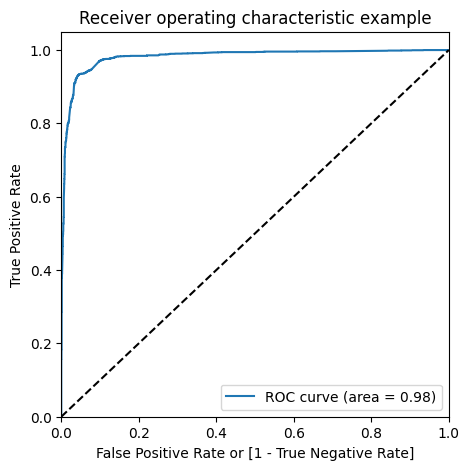

In [72]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

In [73]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.909533,1,1,1,1,1,1,1,1,1,1,1
1,0,0.034140,0,1,0,0,0,0,0,0,0,0,0
2,1,0.969205,1,1,1,1,1,1,1,1,1,1,1
3,1,0.913391,1,1,1,1,1,1,1,1,1,1,1
4,1,0.999092,1,1,1,1,1,1,1,1,1,1,1


In [74]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481166  1.000000  0.000000
0.1   0.1  0.914798  0.982759  0.851772
0.2   0.2  0.929821  0.975303  0.887640
0.3   0.3  0.934305  0.971109  0.900173
0.4   0.4  0.934081  0.946412  0.922645
0.5   0.5  0.939013  0.935694  0.942092
0.6   0.6  0.943946  0.928705  0.958081
0.7   0.7  0.941928  0.918919  0.963267
0.8   0.8  0.923543  0.873253  0.970182
0.9   0.9  0.886099  0.779124  0.985307


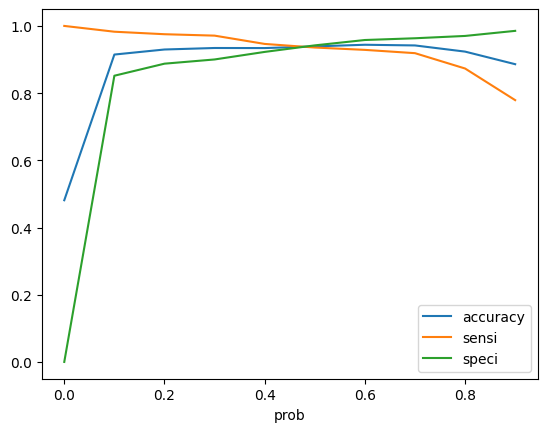

In [75]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()
# from the curve 0.5 is the optimum value which we chose initially so we will stick to it

In [76]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.909533,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.034140,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.969205,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.913391,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.999092,1,1,1,1,1,1,1,1,1,1,1,1


In [77]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9390134529147982

In [78]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2180,  134],
       [ 138, 2008]], dtype=int64)

In [79]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [80]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9356943150046598

In [81]:
# Let us calculate specificity
TN / float(TN+FP)

0.9420916162489196

In [82]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05790838375108038


In [83]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9374416433239963


In [84]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9404659188955996


In [85]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9374416433239963

In [86]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9356943150046598

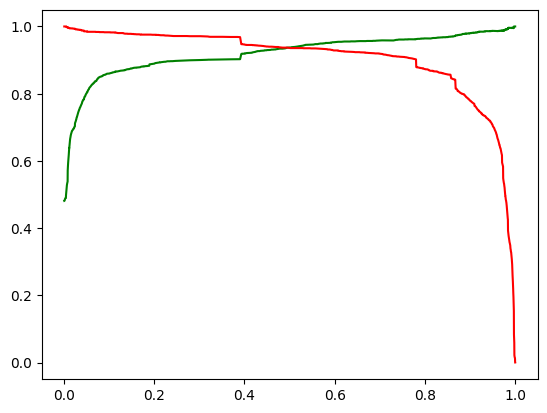

In [87]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## 8 Making predictions on test data

In [88]:
col=X.columns

In [92]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_test = X_test[col]
X_test.head()
                                                                                                   

,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_Email Bounced,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Tagged,Tags_Ringing,Tags_Will revert after reading the email
8441,0.000000,0,0,1,0,0,0,0,0,1
4712,0.007042,0,0,0,0,0,0,0,1,0
5395,0.661532,0,0,1,0,0,0,0,0,1
6271,0.000000,0,0,0,0,0,0,0,0,0
2337,0.639525,0,0,1,0,0,0,1,0,0


In [93]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_Email Bounced,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Tagged,Tags_Ringing,Tags_Will revert after reading the email
8441,0.000000,0,0,1,0,0,0,0,0,1
4712,0.007042,0,0,0,0,0,0,0,1,0
5395,0.661532,0,0,1,0,0,0,0,0,1
6271,0.000000,0,0,0,0,0,0,0,0,0
2337,0.639525,0,0,1,0,0,0,1,0,0


In [94]:
X_test_sm = sm.add_constant(X_test)

In [95]:
y_test_pred = logm6.predict(X_test_sm)

In [96]:
# Storing prediction of test set in the variable 'y_test_pred'
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.973103
1,0,0.004597
2,1,0.996631
3,0,0.008310
4,1,0.964380


In [99]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.973103,1
1,0,0.004597,0
2,1,0.996631,1
3,0,0.008310,0
4,1,0.964380,1
...,...,...,...
1907,0,0.008310,0
1908,0,0.008310,0
1909,0,0.008956,0
1910,1,0.848800,1


In [100]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9461297071129707